# Reaction Diffusion - Modèle de Gray-Scott

On va donc résoudre le système d'équations suivant :
\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F \ (1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k) \ v
\end{align}

Dans ce modèle il y a différentes conditions:
- On remplit continuellement l'expérience de particules u de manière constante
- Quand deux particules v rencontre une u, elles transforment cette dernière en v : $\; 2V+U\rightarrow 3V$
- On retire de manière constante des particules v de l'expérience

F est le terme d'ajout de U tout le long de l'expérience ("Feeding") et k est le terme de retrait de v tout le long de l'expérience ("killing"). Le terme $ u v^2$ représente quant à lui la réaction $\; 2V+U\rightarrow 3V$

In [3]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

Dans notre cas : 
- $\Delta x = \Delta y = \delta$
- $\Delta t = \frac{9}{40}\frac{\delta^2}{\max(D_u, D_v)}$
- On applique des conditions de Neumann sur tous les bords : $ q_x = q_y = 0 $

In [4]:
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

Initialement nous avons :

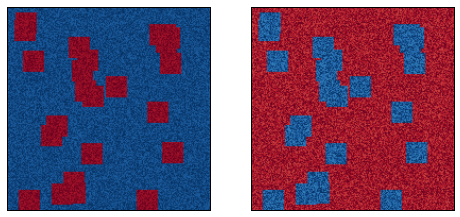

In [5]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Nous allons discrétiser nos deux équations afin de pouvoir les résoudre. Cela nous donne :

\begin{equation}
u^{n+1}_{i,j}= u^n_{i,j} + D_u  \frac{\Delta t}{\delta^2} (u^n_{i+1, j} + u^n_{i-1,j} + u^n_{i, j+1}  + u^n_{i,j-1} - 4u^n_{i,j}) - \Delta t \ u^n_{i,j} \ v^n_{i,j}² + \Delta t \ F \ (1-u^n_{i,j})
\end{equation}

\begin{equation}
v^{n+1}_{i,j}= v^n_{i,j} + D_v  \frac{\Delta t}{\delta^2} (v^n_{i+1, j} + v^n_{i-1,j} + v^n_{i, j+1}  + v^n_{i,j-1} - 4u^v_{i,j}) + \Delta t \ u^n_{i,j} \ v^n_{i,j}² - \Delta t \ (F+k) \ v^n_{i,j}
\end{equation}

Avec comme condition aux bords, car nous avons une grille 192 x 192 :

$$ u^n_{0,j} = u^n_{1,j} $$
$$ u^n_{i,0} = u^n_{i,1} $$
$$ v^n_{0,j} = v^n_{1,j} $$
$$ v^n_{i,0} = v^n_{i,1} $$
$$ u^n_{191,j} = u^n_{190,j} $$
$$ u^n_{i,191} = u^n_{i,190} $$
$$ v^n_{191,j} = v^n_{190,j} $$
$$ v^n_{i,191} = v^n_{i,190} $$



In [6]:
def ftcs(u, v, nt, dt, dh, Du, Dv, F, k):    

    for i in range(nt):
        un = u.copy()
        vn = v.copy()
        u[1:-1,1:-1] = Du*dt/(dh)**2 * (un[2:,1:-1] + un[:-2,1:-1] + un[1:-1,2:] + un[1:-1,:-2] - 4*un[1:-1,1:-1]) - \
            un[1:-1,1:-1] * dt * vn[1:-1,1:-1]**2 + F*dt * (1-un[1:-1,1:-1]) + un[1:-1,1:-1]
        v[1:-1,1:-1] = Dv*dt/(dh)**2 * (vn[2:,1:-1] + vn[:-2,1:-1] + vn[1:-1,2:] + vn[1:-1,:-2] - 4*vn[1:-1,1:-1]) + \
            dt * vn[1:-1,1:-1]**2 * un[1:-1,1:-1] - dt * (F+k) * vn[1:-1,1:-1] + vn[1:-1,1:-1]
            
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:,-2]
        v[-1,:] = v[-2,:]
        v[:,-1] = v[:,-2]
        u[0,:] = u[1,:]
        u[:,0] = u[:,1]
        v[0,:] = v[1,:]
        v[:,0] = v[:,1]
       
    return u,v

On évalue u et v après 8000 secondes

In [7]:
u,v = ftcs(U.copy(), V.copy(), nt, dt, dh, Du, Dv, F, k)

In [8]:
u[100,::40]

array([ 0.92469521,  0.85013834,  0.66815621,  0.90196481,  0.9039502 ])

Voilà comment a évolué notre expérience après 8000 secondes :

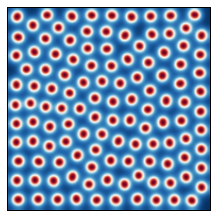

In [9]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(u, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Pour finir, nous pouvons vérifier que la condition CFL soit bien respectée. Celle-ci impose l'inégalité suivante :

$$ \alpha \ (\frac{\Delta t}{(\Delta x)^2} + \frac{\Delta t}{(\Delta y)^2}) < \frac{1}{2} $$

$ \alpha = D_u \ ou \ D_v $

Qui peut être réécrit grâce à $ \Delta x = \Delta y = \delta $ :

$$ \alpha \ \frac{\Delta t}{\delta^2} < \frac{1}{4} $$

In [18]:
CFL = max(Du,Dv)*dt/dh**2
if (CFL< 1/4) :
    print ("Stable : OK !")
else :
        print ("Non-stable : ERROR")

Stable : OK !
